# World Happiness Report 2024 — Download, EDA, and DBSCAN Outlier Detection


## 1) Download dataset from Kaggle

In [14]:
from pathlib import Path

import kagglehub


DATASET = "jainaru/world-happiness-report-2024-yearly-updated"


# Download latest version
path = kagglehub.dataset_download("jainaru/world-happiness-report-2024-yearly-updated")

DATA_DIR = Path(path)

print(f"Downloaded to: {DATA_DIR.resolve()}")

Using Colab cache for faster access to the 'world-happiness-report-2024-yearly-updated' dataset.
Downloaded to: /kaggle/input/world-happiness-report-2024-yearly-updated


## 2) Load data (auto-detect CSV) and basic cleaning

In [28]:
import pandas as pd
import re


# Heuristics to pick the main CSV automatically:
# - prefer CSVs that contain '2024' or 'happiness' in name
# - otherwise fall back to the largest CSV by size
candidates = list(DATA_DIR.glob("*.csv"))
if not candidates:
    raise FileNotFoundError("No CSV files found in ./data after Kaggle download. Check dataset contents.")

def score_csv(path: Path) -> tuple[int, int]:
    name = path.name.lower()
    priority = 0
    if "2024" in name:
        priority += 2
    if "happiness" in name or "world" in name:
        priority += 1
    # negative size to sort descending by size if same priority
    return (priority, -path.stat().st_size)

csv_path = sorted(candidates, key=score_csv, reverse=True)[0]
print(f"Selected CSV: {csv_path.name}")

df = pd.read_csv(csv_path)

# Normalize column names to snake_case for convenience
def to_snake(s: str) -> str:
    s = re.sub(r"[^0-9a-zA-Z]+", "_", s.strip())
    s = re.sub(r"_+", "_", s)
    return s.strip("_").lower()

df.columns = [to_snake(c) for c in df.columns]

print("Columns:", list(df.columns))
print("Rows:", len(df))
display(df.head(10))

cols_to_drop = [c for c in ["upperwhisker", "lowerwhisker"] if c in df.columns]
df = df.drop(columns=cols_to_drop, errors="ignore")

print(f"Dropped columns: {cols_to_drop if cols_to_drop else 'none'}")
display(df.head(10))

Selected CSV: World-happiness-report-2024.csv
Columns: ['country_name', 'regional_indicator', 'ladder_score', 'upperwhisker', 'lowerwhisker', 'log_gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'dystopia_residual']
Rows: 143


,country_name,regional_indicator,ladder_score,upperwhisker,lowerwhisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


Dropped columns: ['upperwhisker', 'lowerwhisker']


,country_name,regional_indicator,ladder_score,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual
0,Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,Western Europe,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,Western Europe,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,Western Europe,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,Western Europe,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,North America and ANZ,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


## 3) Visualizations

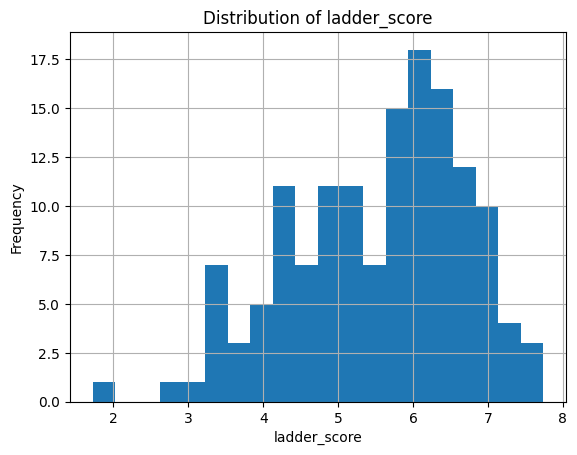

Missing columns for GDP vs score scatter. Found score_col: ladder_score gdp_col: None


In [50]:
import matplotlib.pyplot as plt

# Helper to safely get common WHR columns if they exist
def existing(cols):
    return [c for c in cols if c in df.columns]

possible_score_cols = existing(["ladder_score", "life_ladder", "happiness_score", "score"])
score_col = possible_score_cols[0] if possible_score_cols else None

possible_gdp_cols = existing(["logged_gdp_per_capita", "gdp_per_capita", "gdp_per_capita_log"])
gdp_col = possible_gdp_cols[0] if possible_gdp_cols else None

# 4.1 Histogram of the happiness score
if score_col:
    plt.figure()
    df[score_col].dropna().hist(bins=20)
    plt.title(f"Distribution of {score_col}")
    plt.xlabel(score_col)
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No score-like column found for histogram (looked for:", possible_score_cols, ")")

# 4.2 Scatter: GDP vs happiness score
if score_col and gdp_col:
    plt.figure()
    plt.scatter(df[gdp_col], df[score_col])
    plt.title(f"{score_col} vs {gdp_col}")
    plt.xlabel(gdp_col)
    plt.ylabel(score_col)
    plt.show()
else:
    print("Missing columns for GDP vs score scatter. Found score_col:", score_col, "gdp_col:", gdp_col)

## 5) DBSCAN Outlier Detection

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Pick a robust set of numeric features typically present in WHR-like datasets
candidate_features = [
    "ladder_score", "life_ladder", "happiness_score", "score",
    "logged_gdp_per_capita", "gdp_per_capita", "gdp_per_capita_log",
    "social_support", "healthy_life_expectancy",
    "freedom_to_make_life_choices", "generosity",
    "perceptions_of_corruption"
]

features = [c for c in candidate_features if c in df.columns]
if len(features) < 2:
    raise ValueError(f"Not enough numeric features found for DBSCAN. Found: {features}")

X = df[features].astype(float).fillna(df[features].median(numeric_only=True))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reasonable defaults for standardized data; feel free to tune
db = DBSCAN(eps=1.3, min_samples=5)
labels = db.fit_predict(X_scaled)

df_out = df.copy()
df_out["is_outlier"] = (labels == -1)

outlier_count = int(df_out["is_outlier"].sum())
print(f"Detected {outlier_count} outliers using DBSCAN.")

# Save the enriched CSV
out_csv = Path("data") / "world_happiness_with_outliers.csv"
df_out.to_csv(out_csv, index=False)
print(f"Saved: {out_csv.resolve()}")

Detected 28 outliers using DBSCAN.
Saved: /content/data/world_happiness_with_outliers.csv


### 5.1 Visualize DBSCAN results in 2D (PCA)

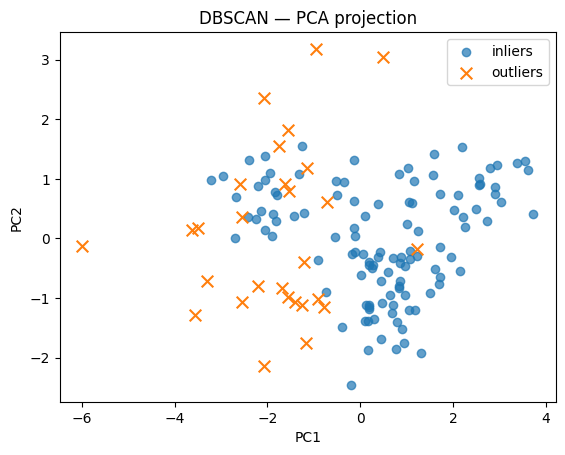

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA to 2D for visualization
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure()
inliers = df_out["is_outlier"] == False
outliers = df_out["is_outlier"] == True

plt.scatter(coords[inliers, 0], coords[inliers, 1], alpha=0.7, label="inliers")
plt.scatter(coords[outliers, 0], coords[outliers, 1], marker="x", s=70, label="outliers")
plt.title("DBSCAN — PCA projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

### 5.2 List outliers (with country/region if available)

In [53]:
# Try to find a name column
name_cols = [c for c in ["country_name", "country", "country_or_region", "countryname"] if c in df_out.columns]
name_col = name_cols[0] if name_cols else None

display_cols = ([name_col] if name_col else []) + features + ["is_outlier"]
outliers_df = df_out[df_out["is_outlier"]][display_cols]
outliers_df.head(50)

,country_name,ladder_score,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,is_outlier
79,Indonesia,5.568,1.184,0.472,0.779,0.399,0.055,True
82,South Africa,5.422,1.369,0.322,0.537,0.078,0.034,True
84,Algeria,5.364,1.191,0.568,0.247,0.091,0.200,True
85,Hong Kong S.A.R. of China,5.316,1.184,0.857,0.485,0.147,0.402,True
89,Mozambique,5.216,0.883,0.156,0.728,0.158,0.196,True
91,Iraq,5.166,0.996,0.498,0.425,0.141,0.048,True
94,Gabon,5.106,1.038,0.344,0.516,0.045,0.100,True
97,Turkiye,4.975,1.175,0.631,0.202,0.068,0.115,True
99,Iran,4.923,1.136,0.571,0.366,0.235,0.123,True
101,Nigeria,4.881,1.075,0.256,0.566,0.201,0.019,True


In [54]:
numeric_cols = df_out.select_dtypes(include="number").columns
summary_diff = (
    df_out.groupby("is_outlier")[numeric_cols].mean().T
    .rename(columns={False: "mean_inliers", True: "mean_outliers"})
)
summary_diff["diff"] = summary_diff["mean_outliers"] - summary_diff["mean_inliers"]
summary_diff.sort_values("diff", ascending=False).head(15)

is_outlier,mean_inliers,mean_outliers,diff
generosity,0.147607,0.140929,-0.006679
perceptions_of_corruption,0.163018,0.118536,-0.044482
healthy_life_expectancy,0.552080,0.396107,-0.155973
freedom_to_make_life_choices,0.666509,0.437071,-0.229438
log_gdp_per_capita,1.439643,1.135464,-0.304179
social_support,1.199357,0.874214,-0.325143
dystopia_residual,1.662866,1.228107,-0.434759
ladder_score,5.819078,4.330357,-1.488721


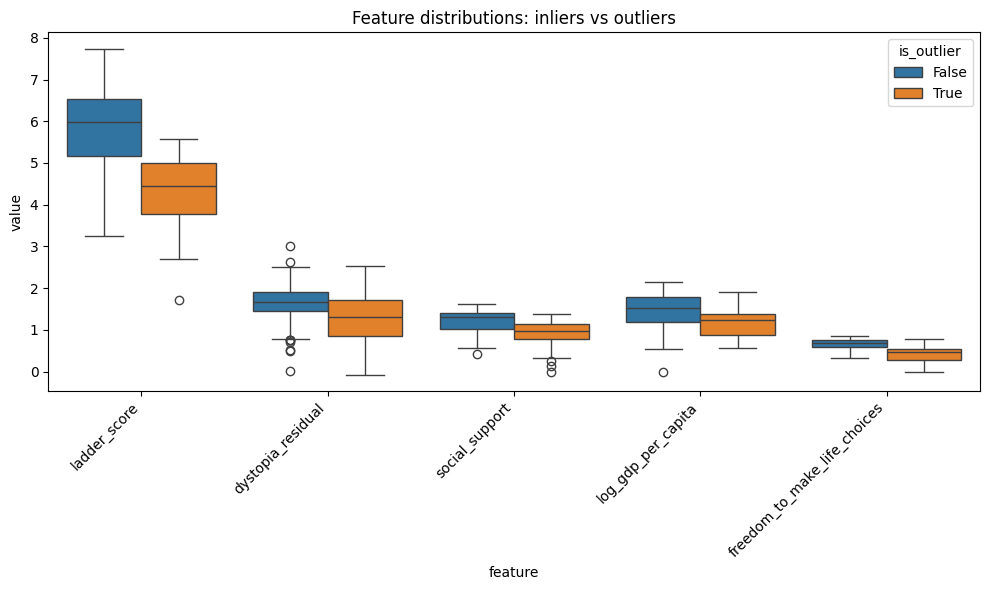

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

key_features = summary_diff["diff"].abs().sort_values(ascending=False).head(5).index

# vyber pouze sloupce, které chceme vizualizovat
cols_for_plot = ["is_outlier"] + list(key_features)
df_plot = df_out[cols_for_plot].copy()

df_out_melt = df_plot.melt(
    id_vars="is_outlier",
    value_vars=key_features,
    var_name="feature",
    value_name="value"
)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_out_melt,
    x="feature", y="value",
    hue="is_outlier",
    dodge=True
)
plt.xticks(rotation=45, ha="right")
plt.title("Feature distributions: inliers vs outliers")
plt.tight_layout()
plt.show()

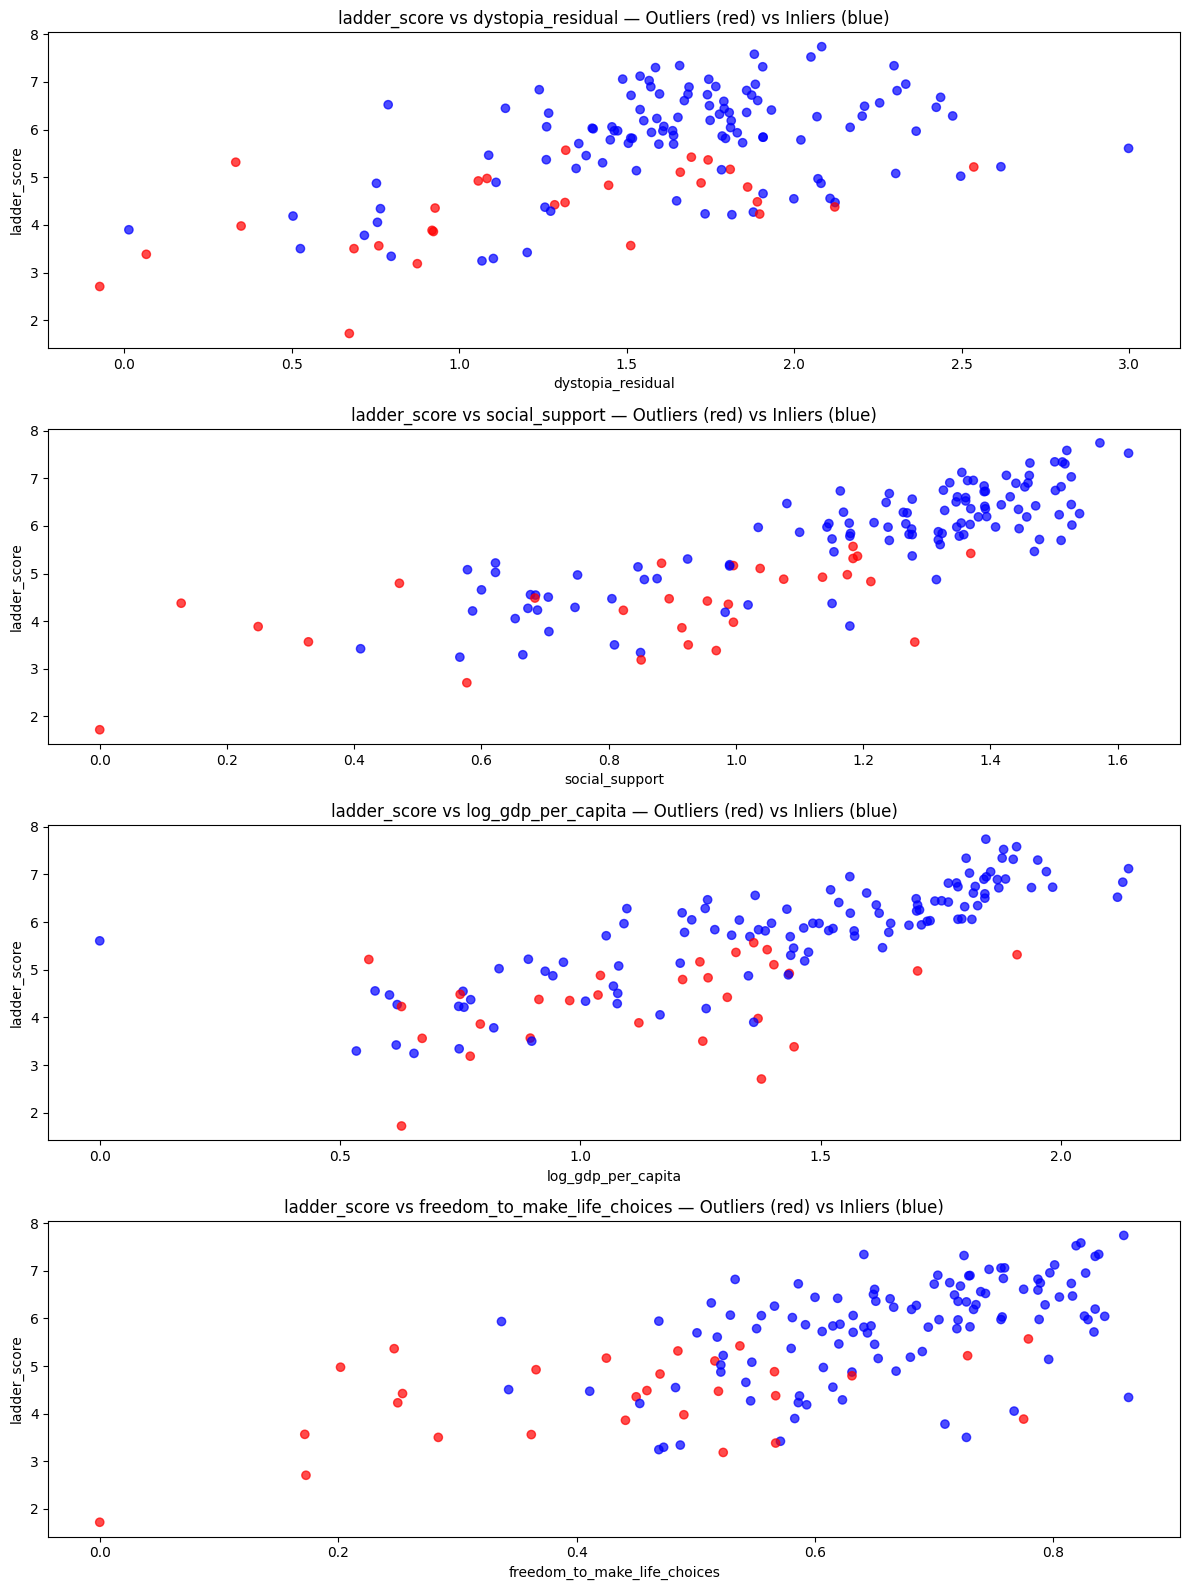

In [56]:
top_features = key_features[:3].tolist()

if len(top_features) >= 1:
    top = top_features[0]
    others = [f for f in key_features if f != top]

    plt.figure(figsize=(12, 4 * len(others)))
    for i, f in enumerate(others, 1):
        plt.subplot(len(others), 1, i)
        plt.scatter(
            df_out[f], df_out[top],
            c=df_out["is_outlier"].map({True: "red", False: "blue"}),
            alpha=0.7
        )
        plt.xlabel(f)
        plt.ylabel(top)
        plt.title(f"{top} vs {f} — Outliers (red) vs Inliers (blue)")

    plt.tight_layout()
    plt.show()
else:
    print("Not enough features for comparison plots.")


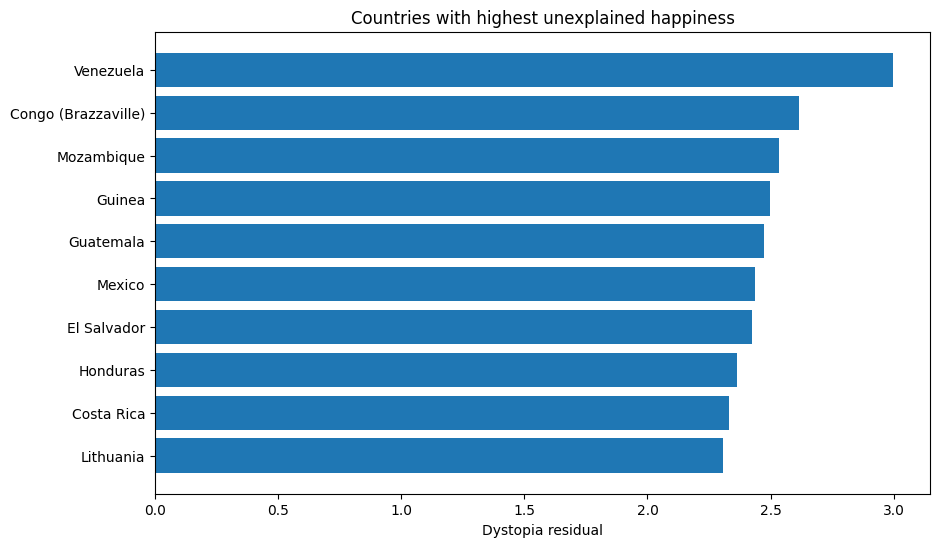

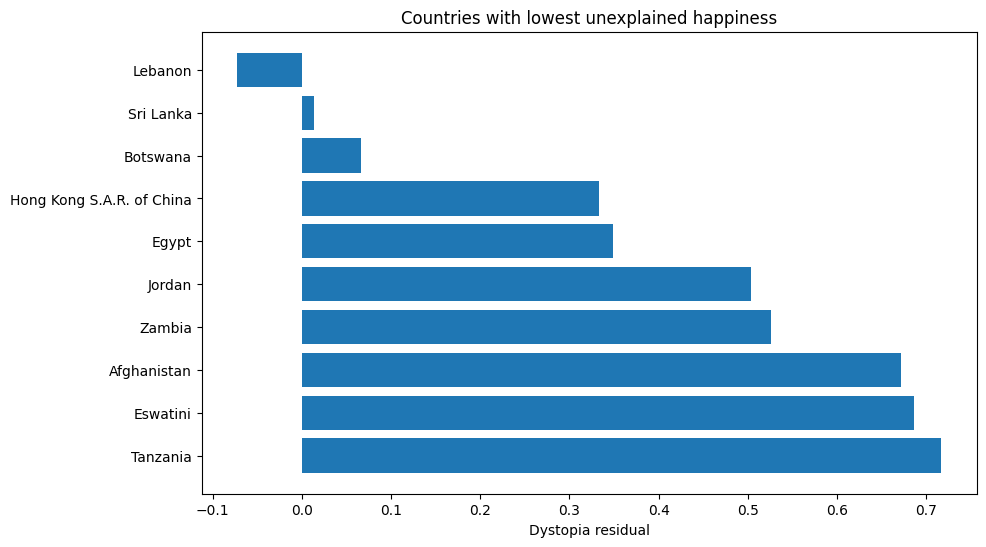

In [47]:
plt.figure(figsize=(10,6))
df_sorted = df.sort_values("dystopia_residual", ascending=False).head(10)
plt.barh(df_sorted["country_name"], df_sorted["dystopia_residual"])
plt.xlabel("Dystopia residual")
plt.title("Countries with highest unexplained happiness")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10,6))
df_sorted = df.sort_values("dystopia_residual", ascending=True).head(10)
plt.barh(df_sorted["country_name"], df_sorted["dystopia_residual"])
plt.xlabel("Dystopia residual")
plt.title("Countries with lowest unexplained happiness")
plt.gca().invert_yaxis()
plt.show()

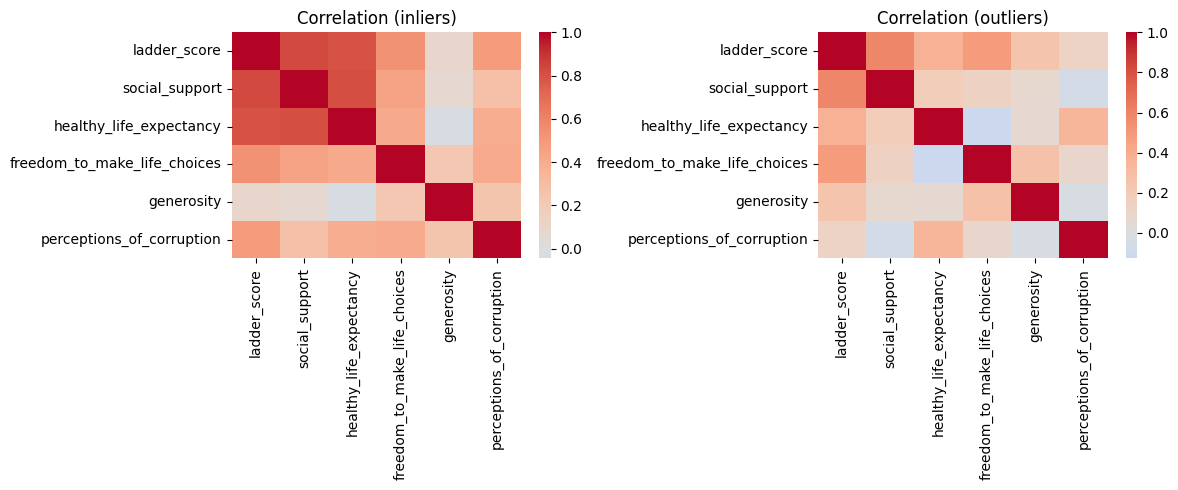

In [48]:
import seaborn as sns
import numpy as np

corr_inliers = df_out.loc[~df_out["is_outlier"], features].corr()
corr_outliers = df_out.loc[df_out["is_outlier"], features].corr()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(corr_inliers, cmap="coolwarm", center=0)
plt.title("Correlation (inliers)")

plt.subplot(1,2,2)
sns.heatmap(corr_outliers, cmap="coolwarm", center=0)
plt.title("Correlation (outliers)")
plt.tight_layout()
plt.show()

In [49]:
import numpy as np
import pandas as pd

# Find column with country names if available
name_col = next((c for c in ["country_name", "country", "country_or_region"] if c in df_out.columns), None)

# Compute z-scores relative to inlier mean and std
inliers = df_out[~df_out["is_outlier"]]
mean_inliers = inliers[features].mean()
std_inliers = inliers[features].std(ddof=0)

z_scores = (df_out[features] - mean_inliers) / std_inliers

# Select only outliers
outlier_rows = df_out[df_out["is_outlier"]].copy()
outlier_z = z_scores.loc[outlier_rows.index]

# For each outlier, find top 3 features where |z-score| is highest
records = []
for idx, row in outlier_z.iterrows():
    top_feats = row.abs().sort_values(ascending=False).head(3).index.tolist()
    top_vals = [f"{f} (z={row[f]:.2f})" for f in top_feats]
    records.append({
        "country": df_out.at[idx, name_col] if name_col else f"row_{idx}",
        "top_differences": ", ".join(top_vals)
    })

pd.DataFrame(records)

,country,top_differences
0,Indonesia,"generosity (z=4.06), freedom_to_make_life_choi..."
1,South Africa,"healthy_life_expectancy (z=-1.57), generosity ..."
2,Algeria,"freedom_to_make_life_choices (z=-3.60), genero..."
3,Hong Kong S.A.R. of China,"healthy_life_expectancy (z=2.08), perceptions_..."
4,Mozambique,"healthy_life_expectancy (z=-2.70), social_supp..."
5,Iraq,"freedom_to_make_life_choices (z=-2.07), percep..."
6,Gabon,"generosity (z=-1.66), healthy_life_expectancy ..."
7,Turkiye,"freedom_to_make_life_choices (z=-3.98), genero..."
8,Iran,"freedom_to_make_life_choices (z=-2.58), genero..."
9,Nigeria,"healthy_life_expectancy (z=-2.02), perceptions..."
